<a href="https://colab.research.google.com/github/ritaxtii/imageProcessing/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D,GlobalAveragePooling2D

In [4]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

In [5]:
# Add new layers
x=base_model.output
x1 = GlobalAveragePooling2D()(x)
x2 = Dense(1024,activation='relu')(x1)
x3 = Dense(1024,activation='relu')(x2)
x4 = Dense(512,activation='relu')(x3)
pred = Dense(3,activation='Softmax')(x4)
model=Model(inputs=base_model.input,outputs=pred)
model.summary()
for layer in model.layers[:86]:
  layer.trainable=False #Freeze base model
for layer in model.layers[86:]:
  layer.trainable=True #Freeze base model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [6]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [26]:
!unzip "/content/Ship.zip" -d "/content/Ship/"

Archive:  /content/Ship.zip
   creating: /content/Ship/Test/
   creating: /content/Ship/Test/battle ship/
  inflating: /content/Ship/Test/battle ship/t1.jpg  
  inflating: /content/Ship/Test/battle ship/t2.jpg  
 extracting: /content/Ship/Test/battle ship/t3.jpg  
  inflating: /content/Ship/Test/battle ship/t4.jpg  
 extracting: /content/Ship/Test/battle ship/t5.webp  
 extracting: /content/Ship/Test/battle ship/t6.webp  
   creating: /content/Ship/Test/patrol ship/
  inflating: /content/Ship/Test/patrol ship/p1.jpg  
  inflating: /content/Ship/Test/patrol ship/p2.jpg  
  inflating: /content/Ship/Test/patrol ship/p3.jpg  
  inflating: /content/Ship/Test/patrol ship/p4.jpg  
  inflating: /content/Ship/Test/patrol ship/p5.jpg  
 extracting: /content/Ship/Test/patrol ship/p6.jpg  
   creating: /content/Ship/Test/submarine/
  inflating: /content/Ship/Test/submarine/s1.jpg  
  inflating: /content/Ship/Test/submarine/s2.jpg  
  inflating: /content/Ship/Test/submarine/s3.jpg  
  inflating: /c

In [7]:
#Create DataGeneartor Object
datagen=ImageDataGenerator( rotation_range=20,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True,
                                              preprocessing_function=preprocess_input,
                                              fill_mode="nearest")

In [8]:
# Create Train Image generator
train_generator=datagen.flow_from_directory('/content/Ship/Train',
                                                                  target_size=(224,224),
                                                                  color_mode='rgb',
                                                                  batch_size = 32,
                                                                  class_mode='categorical',
                                                                  seed = 42,
                                                                  shuffle=True)

Found 97 images belonging to 3 classes.


In [9]:
# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/Ship/Validate',
                                                                target_size=(224,224),
                                                                color_mode='rgb',
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                seed = 42,
                                                                shuffle=True)

Found 69 images belonging to 3 classes.


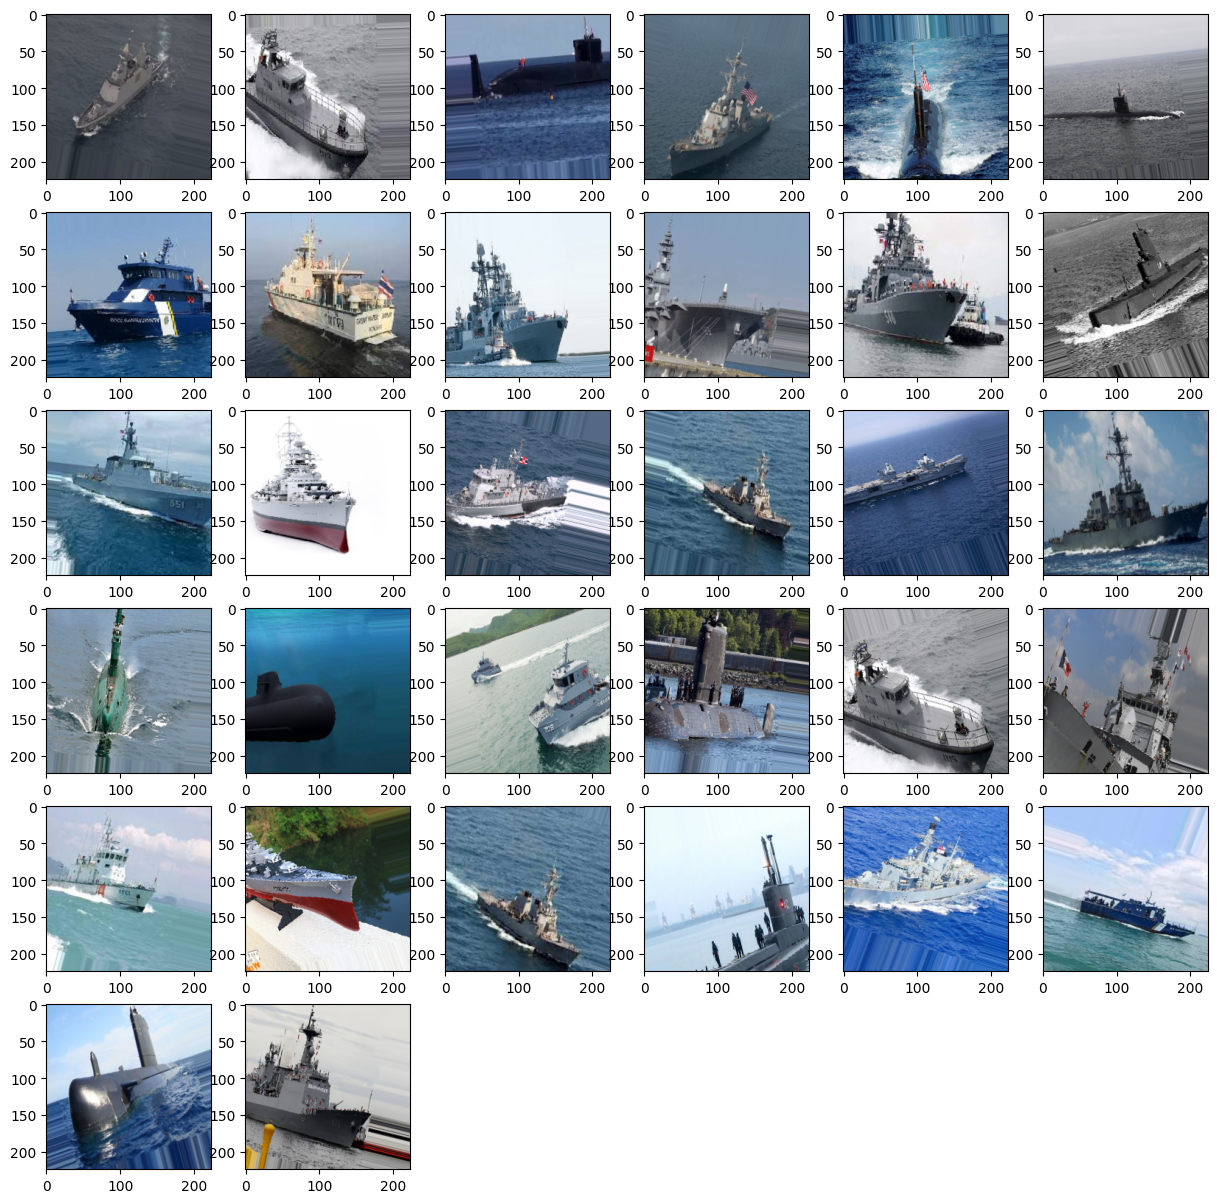

In [10]:
plt.figure(figsize=(15, 15))

batch = train_generator.next()
batch_size = batch[0].shape[0]
for i in range(0,batch_size):
  Img_trian = (batch[0][i]+1)/2 #rescale
  plt.subplot(6, 6, i+1)
  plt.imshow(Img_trian)


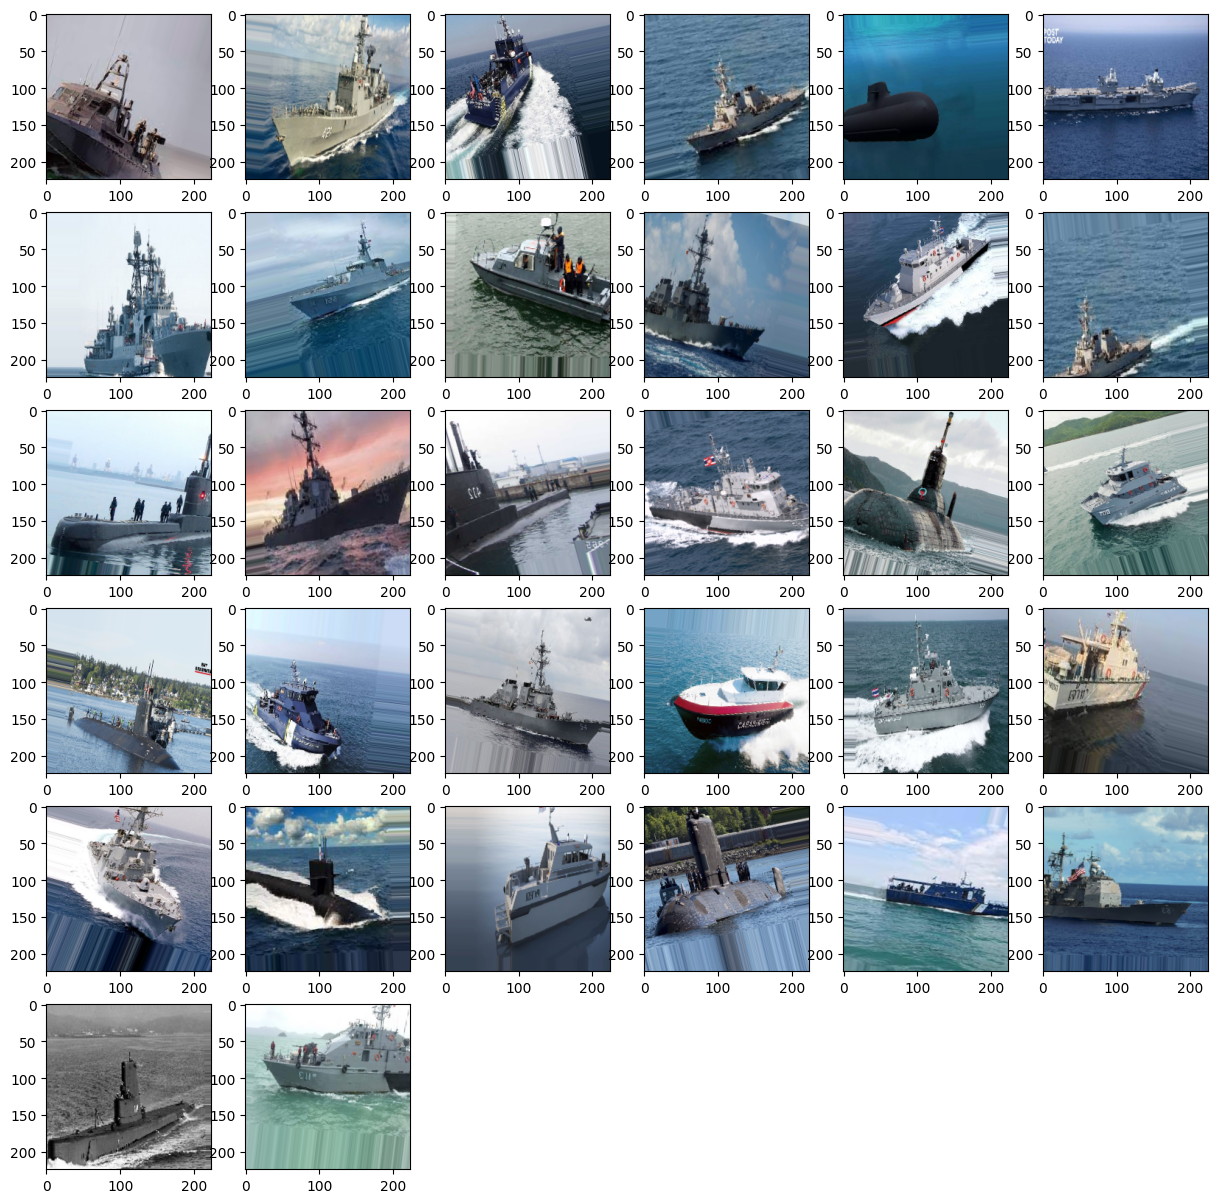

In [11]:
plt.figure(figsize=(15, 15))

batch = val_generator.next()
batch_size = batch[0].shape[0]
for i in range(0,batch_size):
  Img_val = (batch[0][i]+1)/2 #rescale
  plt.subplot(6, 6, i+1)
  plt.imshow(Img_val)

In [13]:
# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

In [17]:
# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal

In [18]:
history=model.fit_generator(generator=train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

<ipython-input-18-053a03c67a17>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 15s 2s/step - loss: 1.1389 - accuracy: 0.3231 - val_loss: 0.9365 - val_accuracy: 0.6094
Epoch 2/100
3/3 [==============================] - 2s 1s/step - loss: 1.0185 - accuracy: 0.3846 - val_loss: 0.9063 - val_accuracy: 0.4062
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.8431 - accuracy: 0.5625 - val_loss: 0.6505 - val_accuracy: 0.8281
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.6734 - accuracy: 0.7812 - val_loss: 0.6026 - val_accuracy: 0.7812
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.5692 - accuracy: 0.7692 - val_loss: 0.4959 - val_accuracy: 0.8750
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.4911 - accuracy: 0.8308 - val_loss: 0.3976 - val_accuracy: 0.9375
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.3461 - accuracy: 0.9385 - val_loss: 0.3934 - val_accuracy: 0.8906
Epoch 8/100
3/3 [================

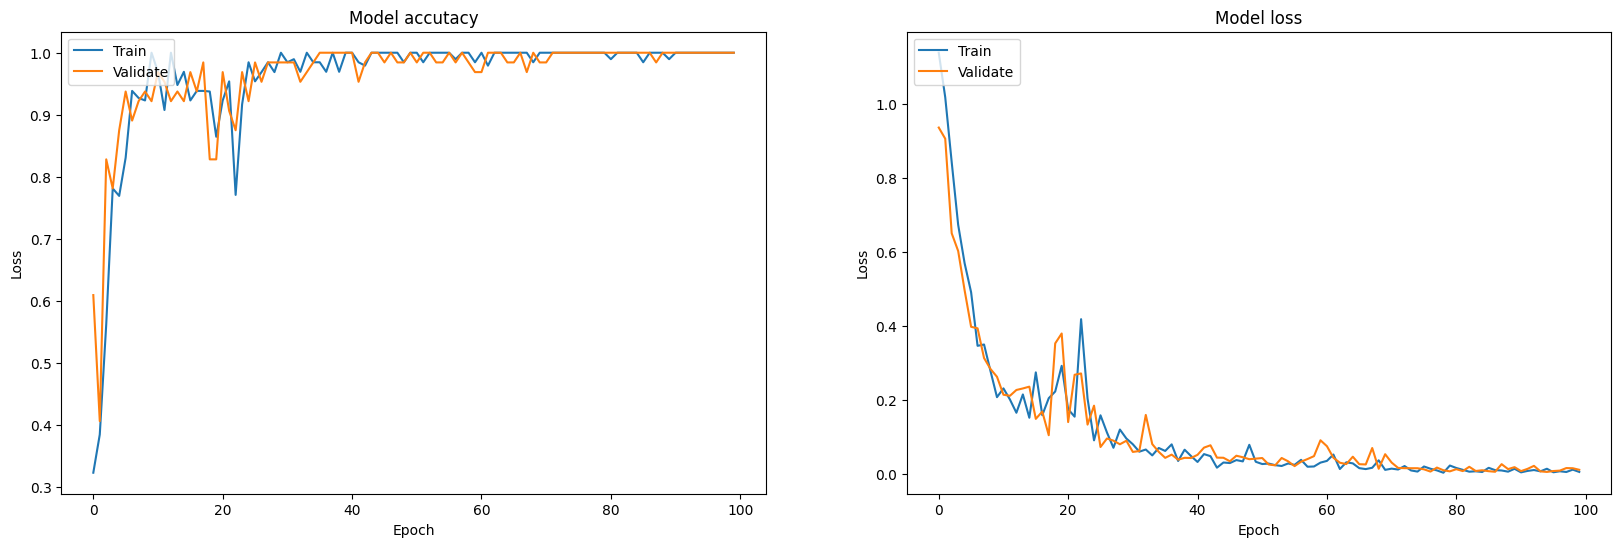

In [37]:
# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

In [39]:
# Initial test generator
Test_generator = datagen.flow_from_directory(
    '/content/Ship/Test',
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

Found 15 images belonging to 3 classes.


In [41]:
#Get class id for y_real_class
y_true = Test_generator.classes

In [42]:
#predict images according to test_generator # number of real class
preds = model.predict_generator(Test_generator)
print(preds.shape)
print(preds)

<ipython-input-42-ae85343779ce>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(Test_generator)


(15, 3)
[[8.84446144e-01 1.14352018e-01 1.20187528e-03]
 [9.30169880e-01 6.84615299e-02 1.36855070e-03]
 [9.80335474e-01 1.89461205e-02 7.18403084e-04]
 [7.29987323e-01 1.28042057e-01 1.41970560e-01]
 [1.36635220e-02 9.80271399e-01 6.06504781e-03]
 [2.78387833e-02 9.68476713e-01 3.68446880e-03]
 [2.35067029e-02 9.61602628e-01 1.48906605e-02]
 [8.51134181e-01 1.40797645e-01 8.06819927e-03]
 [5.20768444e-05 9.99915123e-01 3.27482812e-05]
 [1.90934651e-02 9.06335652e-01 7.45708644e-02]
 [6.47154753e-04 1.44467031e-05 9.99338329e-01]
 [3.20666321e-02 4.98403683e-02 9.18092966e-01]
 [1.50899030e-03 1.26053998e-02 9.85885620e-01]
 [8.27377737e-01 5.15488647e-02 1.21073410e-01]
 [9.49387206e-04 3.63092124e-02 9.62741375e-01]]


In [44]:
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 0 1 1 2 2 2 0 2]


In [50]:
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[4 0 0]
 [1 5 0]
 [1 0 4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.83      0.91         6
           2       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.89      0.88      0.87        15
weighted avg       0.91      0.87      0.87        15

